In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Load in the data
df = pd.read_csv(r"../data/first_1000_JSON_files.csv", low_memory=True)

# Create a copy of the dataframe to work with
df_copy = df.copy()

C:\Users\hb888\AppData\Local\Temp\ipykernel_25048\59152341.py:2: DtypeWarning: Columns (51,59,62,63,67,69,72,73,86,88,90,91,93,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"../data/first_1000_JSON_files.csv", low_memory=True)


In [61]:
df.columns

Index(['_id', 'imei', 'dts', 'dtd', 'event.key', 'event.dte',
       'tracker.metric.bbatv', 'tracker.metric.bbatp', 'tracker.loc.dtg',
       'tracker.loc.hdop', 'tracker.loc.alt', 'tracker.loc.ang',
       'tracker.loc.sp', 'tracker.gsm.mcc', 'tracker.gsm.mnc',
       'tracker.gsm.lac', 'tracker.gsm.cid', 'tracker.metric.rssi',
       'tracker.metric.moving', 'device.metric.deculock',
       'device.metric.dstatus', 'tracker.config.poutput',
       'device.metric.bsocp', 'device.metric.bmv', 'device.config.bfcc',
       'device.config.bfccp', 'device.metric.btemp', 'device.metric.bpackv',
       'tracker.config.ecutype', 'device.metric.bcyc', 'device.config.dwheel',
       'device.config.bdcc', 'device.config.bnomv', 'device.config.ecutype',
       'device.metric.delectemp', 'device.metric.dpedcad',
       'device.metric.dactualsp', 'device.metric.dlight',
       'device.metric.dwheels', 'device.metric.bcur', 'device.metric.bstate',
       'device.metric.msupp', 'device.metric.mpow',

In [62]:
# show the unique values in the 'event.key' column and their counts
df['event.key'].value_counts()

battery_info                   37754
crash_data                     20320
backup_to_main_battery         17495
main_to_backup_battery         17469
rest_to_motion                 17368
motion_to_rest                 16904
device_off                      8662
device_on                       8459
moving_start                    6413
moving_stop                     6360
charging_start                  5579
charging_stop                   5507
ride_stop                       4828
ride_start                      4778
crashed                         2914
crashdetection_nocrash          2690
main_battery_charging_stop      1875
main_battery_charging_start     1870
battery_low                     1424
bluetooth_info                   565
device_info                      518
geofence-in                      349
geofence-out                     337
rebooting                        160
highspeed                        121
ecu_unlock_success                21
ecu_lock_success                  12
c

In [89]:
# show the entire value in the 'imei' column. not the truncated version
pd.set_option('display.max_colwidth', None)

In [63]:
df_copy.head(5)

,_id,imei,dts,dtd,event.key,event.dte,tracker.metric.bbatv,tracker.metric.bbatp,tracker.loc.dtg,tracker.loc.hdop,...,event.meta.true_crash_proba,event.meta.uuid,buff,event.meta.geofence_id,event.meta.triggered_by,device.metric.merr,tracker.config.fwver,tracker.config.gsmfwver,event.meta.message,event.meta.step
0,fc9878d4-f775-48d8-b8af-20da7c7775f2,8.685001e+14,2023-11-25T11:54:55Z,2023-11-25T11:54:47Z,battery_info,2023-11-25T11:54:47Z,3.785,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,753da335-f4cb-45c5-b580-49c74da8be4c,8.685001e+14,2023-11-26T11:54:31Z,2023-11-26T11:54:29Z,NaN,NaN,3.785,45.0,2023-11-19T11:55:21Z,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fa6c8dc8-d4eb-4c00-8cfa-6b7343d18bb5,8.685001e+14,2023-11-27T11:54:50Z,2023-11-27T11:54:47Z,battery_info,2023-11-27T11:54:47Z,3.778,43.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,061af346-83ce-4a31-8209-f1f6820800e9,8.685001e+14,2023-11-29T07:20:19Z,2023-11-29T07:19:56Z,motion_to_rest,2023-11-29T07:19:56Z,NaN,NaN,2023-11-19T11:55:21Z,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f7295490-5b01-459a-98f7-ef45888b27e9,8.685001e+14,2023-11-29T07:20:19Z,2023-11-29T07:20:14Z,NaN,NaN,3.778,43.0,2023-11-19T11:55:21Z,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df.describe()

,imei,tracker.metric.bbatv,tracker.metric.bbatp,tracker.loc.hdop,tracker.loc.alt,tracker.loc.ang,tracker.loc.sp,tracker.gsm.mcc,tracker.gsm.mnc,tracker.gsm.lac,...,event.meta.motion_time,event.meta.post_crash_deviation,event.meta.post_crash_speed,event.meta.pre_crash_deviation,event.meta.probability_threshold,event.meta.start_crash_proba,event.meta.true_crash_proba,event.meta.geofence_id,tracker.config.fwver,event.meta.step
count,7.258610e+05,354249.000000,354249.000000,301817.000000,301817.000000,301817.000000,301817.000000,302377.000000,302377.000000,302377.000000,...,2698.000000,2698.000000,2429.000000,2698.000000,2698.0,2698.0,2698.000000,686.000000,2.00000,6.000000
mean,8.685001e+14,4.026312,84.291834,0.914862,8.728253,132.922890,11.949913,204.014928,8.014664,3283.314981,...,522.137139,0.597368,15.573075,0.608667,50.0,30.0,34.704107,71963.383382,1.55500,2.333333
std,5.889153e+03,0.268007,24.887891,0.385368,75.580734,119.772451,10.108115,0.513157,0.784375,719.523749,...,2891.755068,0.354705,7.356599,0.399790,0.0,0.0,4.838542,14385.329196,0.72832,0.816497
min,8.685001e+14,0.000000,0.000000,0.000000,-644.000000,0.000000,0.000000,204.000000,1.000000,12.000000,...,-1.000000,0.003371,0.000000,0.022666,50.0,30.0,21.870000,54987.000000,1.04000,1.000000
25%,8.685001e+14,3.991000,80.000000,1.000000,-5.000000,0.000000,0.000000,204.000000,8.000000,3140.000000,...,74.000000,0.332655,12.000000,0.313812,50.0,30.0,35.640000,62922.000000,1.29750,2.000000
50%,8.685001e+14,4.102000,97.000000,1.000000,4.000000,114.000000,14.000000,204.000000,8.000000,3260.000000,...,185.000000,0.528799,17.000000,0.494587,50.0,30.0,35.640000,65321.000000,1.55500,2.500000
75%,8.685001e+14,4.147000,100.000000,1.000000,17.000000,240.000000,20.000000,204.000000,8.000000,3360.000000,...,473.750000,0.779753,21.000000,0.798071,50.0,30.0,35.640000,79529.250000,1.81250,3.000000
max,8.685001e+14,4.228000,100.000000,6.000000,9294.000000,359.000000,149.000000,270.000000,99.000000,49308.000000,...,79777.000000,3.334789,37.000000,2.551362,50.0,30.0,85.536000,110384.000000,2.07000,3.000000


In [101]:
# show a few values in the 'imei" column and sohw the entire value not the truncated version
df['imei'].value_counts()

# change the value in the imei column to display  from scientific notation to standard notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.dtypes

# change imei column to a int64 data type
df['imei'] = df['imei'].astype('int64')

# show the duplicates in the imei column
df['imei'].value_counts()

# show the top 10
df['imei'].value_counts().head(10)

868500050064237    29506
868500050064351    17504
868500050060516    15413
868500050058080    14272
868500050062249    11400
868500050068279    11159
868500050058692    10214
868500050059781     7659
868500050064716     7117
868500050061613     5113
Name: imei, dtype: int64

In [65]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725861 entries, 0 to 725860
Data columns (total 99 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   _id                                  725861 non-null  object 
 1   imei                                 725861 non-null  float64
 2   dts                                  725861 non-null  object 
 3   dtd                                  699926 non-null  object 
 4   event.key                            190767 non-null  object 
 5   event.dte                            190767 non-null  object 
 6   tracker.metric.bbatv                 354249 non-null  float64
 7   tracker.metric.bbatp                 354249 non-null  float64
 8   tracker.loc.dtg                      301755 non-null  object 
 9   tracker.loc.hdop                     301817 non-null  float64
 10  tracker.loc.alt                      301817 non-null  float64
 11  tracker.loc.a

In [66]:
# Show the columns where the number of NaN values is at least 80% of the rows
df_copy.columns[df_copy.isna().sum() > 0.8 * len(df_copy)]

# Save these columns to a variable called columns_to_drop_because_of_80_percent_NaN
columns_to_drop_because_of_80_percent_NaN = df_copy.columns[df_copy.isna().sum() > 0.8 * len(df_copy)]

# Drop these columns from the dataframe
df_copy = df_copy.drop(columns=columns_to_drop_because_of_80_percent_NaN)

In [67]:
df_copy

,_id,imei,dts,dtd,event.key,event.dte,tracker.metric.bbatv,tracker.metric.bbatp,tracker.loc.dtg,tracker.loc.hdop,...,device.metric.dmostw,device.metric.dridem,device.metric.ddayl,device.metric.dcontodo,device.metric.dtrip,device.metric.dwalk,device.metric.drange,device.metric.dodo,device.metric.dodom,file_name
0,fc9878d4-f775-48d8-b8af-20da7c7775f2,8.685001e+14,2023-11-25T11:54:55Z,2023-11-25T11:54:47Z,battery_info,2023-11-25T11:54:47Z,3.785,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050010859
1,753da335-f4cb-45c5-b580-49c74da8be4c,8.685001e+14,2023-11-26T11:54:31Z,2023-11-26T11:54:29Z,NaN,NaN,3.785,45.0,2023-11-19T11:55:21Z,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050010859
2,fa6c8dc8-d4eb-4c00-8cfa-6b7343d18bb5,8.685001e+14,2023-11-27T11:54:50Z,2023-11-27T11:54:47Z,battery_info,2023-11-27T11:54:47Z,3.778,43.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050010859
3,061af346-83ce-4a31-8209-f1f6820800e9,8.685001e+14,2023-11-29T07:20:19Z,2023-11-29T07:19:56Z,motion_to_rest,2023-11-29T07:19:56Z,NaN,NaN,2023-11-19T11:55:21Z,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050010859
4,f7295490-5b01-459a-98f7-ef45888b27e9,8.685001e+14,2023-11-29T07:20:19Z,2023-11-29T07:20:14Z,NaN,NaN,3.778,43.0,2023-11-19T11:55:21Z,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050010859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725856,9859b82d-cb15-4441-bd93-cd05c217f90f,8.685001e+14,2023-11-14T05:12:07Z,2023-11-14T05:12:09Z,NaN,NaN,3.678,27.0,2023-10-21T05:11:42Z,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050069160
725857,6347c278-b3d0-4f11-9769-27ccc893352d,8.685001e+14,2023-11-15T05:09:42Z,2023-11-15T05:09:46Z,battery_info,2023-11-15T05:09:46Z,3.678,27.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050069160
725858,83903a2c-0296-4e0d-86bb-4457bb0c9fa6,8.685001e+14,2023-11-17T05:08:29Z,2023-11-17T05:08:34Z,battery_low,2023-11-17T05:08:34Z,3.678,27.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050069160
725859,ecc0713c-0aa5-4257-b3ea-d7b72dd033c1,8.685001e+14,2023-11-17T05:09:40Z,2023-11-17T05:09:46Z,battery_info,2023-11-17T05:09:46Z,3.671,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,868500050069160


In [68]:
# Drop the columns that are not useful for the analysis
columns_to_drop = ['_id', 'imei', 'dts', 'dtd', 'event.dte', 'tracker.loc.dtg', 'tracker.loc.hdop', 'tracker.loc.alt', 'tracker.loc.ang', 'tracker.loc.sp', 'tracker.gsm.mcc', 'tracker.gsm.mnc', 'tracker.gsm.lac', 'tracker.gsm.cid',
                   'tracker.metric.deculock', 'tracker.metric.dstatus', 'file_name']

# Check if the columns are in the dataframe and remove the ones that are
for column in columns_to_drop:
    if column in df_copy.columns:
        df_copy = df_copy.drop(columns=column)

In [69]:
df_copy

,event.key,tracker.metric.bbatv,tracker.metric.bbatp,tracker.metric.rssi,tracker.metric.moving,device.metric.deculock,device.metric.dstatus,device.metric.bsocp,device.metric.bmv,device.metric.btemp,...,device.metric.dmostv,device.metric.dmostw,device.metric.dridem,device.metric.ddayl,device.metric.dcontodo,device.metric.dtrip,device.metric.dwalk,device.metric.drange,device.metric.dodo,device.metric.dodom
0,battery_info,3.785,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.785,45.0,22.0,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,battery_info,3.778,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,motion_to_rest,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.778,43.0,22.0,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725856,NaN,3.678,27.0,8.0,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725857,battery_info,3.678,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725858,battery_low,3.678,27.0,NaN,NaN,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725859,battery_info,3.671,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Show the number of NaN values per column and order them from highest to lowest
df_copy.isna().sum().sort_values(ascending=False)

event.key                  535094
device.metric.drange       532459
device.metric.mpow         531174
device.metric.dodo         530740
device.metric.dodom        530740
device.metric.dwalk        529275
device.metric.delectemp    528795
device.metric.dmostu       528548
device.metric.dmostw       528548
device.metric.dmostv       528548
device.metric.dpedcad      511794
device.metric.dcontodo     510573
device.metric.msupp        510510
device.metric.dtrip        510510
device.metric.ddayl        510510
device.metric.dridem       510510
device.metric.dlight       510510
device.metric.dactualsp    510510
device.metric.bcur         510417
device.metric.bstate       506672
device.metric.bcyc         494284
device.metric.btemp        493652
device.metric.bsocp        485758
tracker.metric.rssi        460702
device.metric.bmv          445365
device.metric.bpackv       441362
tracker.metric.moving      423484
tracker.metric.bbatv       371612
tracker.metric.bbatp       371612
device.metric.

In [71]:
# Show the percentage of NaN values per column and order them from highest to lowest
df_copy.isna().sum().sort_values(ascending=False) / len(df_copy)

event.key                  0.737185
device.metric.drange       0.733555
device.metric.mpow         0.731785
device.metric.dodo         0.731187
device.metric.dodom        0.731187
device.metric.dwalk        0.729169
device.metric.delectemp    0.728507
device.metric.dmostu       0.728167
device.metric.dmostw       0.728167
device.metric.dmostv       0.728167
device.metric.dpedcad      0.705085
device.metric.dcontodo     0.703403
device.metric.msupp        0.703316
device.metric.dtrip        0.703316
device.metric.ddayl        0.703316
device.metric.dridem       0.703316
device.metric.dlight       0.703316
device.metric.dactualsp    0.703316
device.metric.bcur         0.703188
device.metric.bstate       0.698029
device.metric.bcyc         0.680962
device.metric.btemp        0.680092
device.metric.bsocp        0.669216
tracker.metric.rssi        0.634697
device.metric.bmv          0.613568
device.metric.bpackv       0.608053
tracker.metric.moving      0.583423
tracker.metric.bbatv       0

In [72]:
# Remove the rows where the number of NaN values is at least 50% of the columns
df_copy = df_copy.dropna(thresh=0.5*len(df_copy.columns))

In [73]:
# one hot encode the column "event.key" and drop the original column
df_copy = pd.get_dummies(df_copy, columns=['event.key'], drop_first=True)

In [74]:
df_copy

,tracker.metric.bbatv,tracker.metric.bbatp,tracker.metric.rssi,tracker.metric.moving,device.metric.deculock,device.metric.dstatus,device.metric.bsocp,device.metric.bmv,device.metric.btemp,device.metric.bpackv,...,device.metric.dmostv,device.metric.dmostw,device.metric.dridem,device.metric.ddayl,device.metric.dcontodo,device.metric.dtrip,device.metric.dwalk,device.metric.drange,device.metric.dodo,device.metric.dodom
12,NaN,NaN,NaN,NaN,False,True,10.0,NaN,3.0,33.52,...,0.0,0.0,1.0,True,722.0,722.0,False,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,False,True,10.0,NaN,3.0,33.52,...,0.0,0.0,1.0,True,722.0,722.0,False,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,False,True,10.0,NaN,3.0,33.77,...,0.0,0.0,1.0,False,722.0,722.0,False,13.0,NaN,NaN
28,NaN,NaN,NaN,NaN,False,True,10.0,NaN,3.0,34.87,...,4.0,4.0,1.0,False,722.0,722.0,False,13.0,722.0,722000.0
29,NaN,NaN,NaN,NaN,False,True,10.0,NaN,3.0,34.93,...,4.0,4.0,1.0,False,722.0,722.0,False,13.0,722.0,722000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725832,NaN,NaN,NaN,NaN,False,True,61.0,NaN,3.0,37.56,...,17.0,17.0,1.0,False,870.0,870.7,False,74.0,870.0,870000.0
725835,NaN,NaN,NaN,NaN,False,True,61.0,NaN,3.0,38.28,...,17.0,17.0,1.0,False,870.0,870.9,False,74.0,870.0,870000.0
725838,NaN,NaN,NaN,NaN,False,True,61.0,NaN,3.0,38.44,...,16.0,16.0,1.0,False,871.0,871.1,False,84.0,871.0,871000.0
725842,NaN,NaN,NaN,NaN,False,True,61.0,NaN,3.0,38.54,...,16.0,16.0,1.0,False,871.0,871.2,False,84.0,871.0,871000.0


In [75]:
# Show the amount of naN vales per column
df_copy.isna().sum()

# Remove the columns with more than 100000 NaN values
df_copy = df_copy.dropna(axis=1, thresh=100000)

df_copy

# Create a dataframe called df_variables that is a copy of df_copy
df_variables = df_copy.copy()

In [76]:
df_variables

,device.metric.deculock,device.metric.dstatus,device.metric.bsocp,device.metric.btemp,device.metric.bpackv,device.metric.bcyc,device.metric.delectemp,device.metric.dpedcad,device.metric.dactualsp,device.metric.dlight,...,device.metric.dmostv,device.metric.dmostw,device.metric.dridem,device.metric.ddayl,device.metric.dcontodo,device.metric.dtrip,device.metric.dwalk,device.metric.drange,device.metric.dodo,device.metric.dodom
12,False,True,10.0,3.0,33.52,0.0,0.0,0.0,0.0,False,...,0.0,0.0,1.0,True,722.0,722.0,False,NaN,NaN,NaN
20,False,True,10.0,3.0,33.52,0.0,0.0,0.0,0.0,False,...,0.0,0.0,1.0,True,722.0,722.0,False,NaN,NaN,NaN
27,False,True,10.0,3.0,33.77,11.0,0.0,0.0,0.0,False,...,0.0,0.0,1.0,False,722.0,722.0,False,13.0,NaN,NaN
28,False,True,10.0,3.0,34.87,11.0,4.0,0.0,0.0,False,...,4.0,4.0,1.0,False,722.0,722.0,False,13.0,722.0,722000.0
29,False,True,10.0,3.0,34.93,11.0,4.0,0.0,0.0,False,...,4.0,4.0,1.0,False,722.0,722.0,False,13.0,722.0,722000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725832,False,True,61.0,3.0,37.56,48.0,17.0,45.0,20.0,True,...,17.0,17.0,1.0,False,870.0,870.7,False,74.0,870.0,870000.0
725835,False,True,61.0,3.0,38.28,48.0,17.0,11.0,20.0,True,...,17.0,17.0,1.0,False,870.0,870.9,False,74.0,870.0,870000.0
725838,False,True,61.0,3.0,38.44,48.0,16.0,0.0,18.0,True,...,16.0,16.0,1.0,False,871.0,871.1,False,84.0,871.0,871000.0
725842,False,True,61.0,3.0,38.54,48.0,16.0,0.0,10.0,True,...,16.0,16.0,1.0,False,871.0,871.2,False,84.0,871.0,871000.0


In [77]:
df_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198167 entries, 12 to 725846
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   device.metric.deculock   198167 non-null  object 
 1   device.metric.dstatus    198165 non-null  object 
 2   device.metric.bsocp      198165 non-null  float64
 3   device.metric.btemp      198157 non-null  float64
 4   device.metric.bpackv     198165 non-null  float64
 5   device.metric.bcyc       196481 non-null  float64
 6   device.metric.delectemp  197066 non-null  float64
 7   device.metric.dpedcad    198133 non-null  float64
 8   device.metric.dactualsp  198167 non-null  float64
 9   device.metric.dlight     198167 non-null  object 
 10  device.metric.bcur       198165 non-null  float64
 11  device.metric.bstate     198165 non-null  float64
 12  device.metric.msupp      198167 non-null  float64
 13  device.metric.mpow       194661 non-null  float64
 14  dev

In [78]:
# for the NaN values, fill them with the mean of the column
df_variables = df_variables.fillna(df_variables.mean())

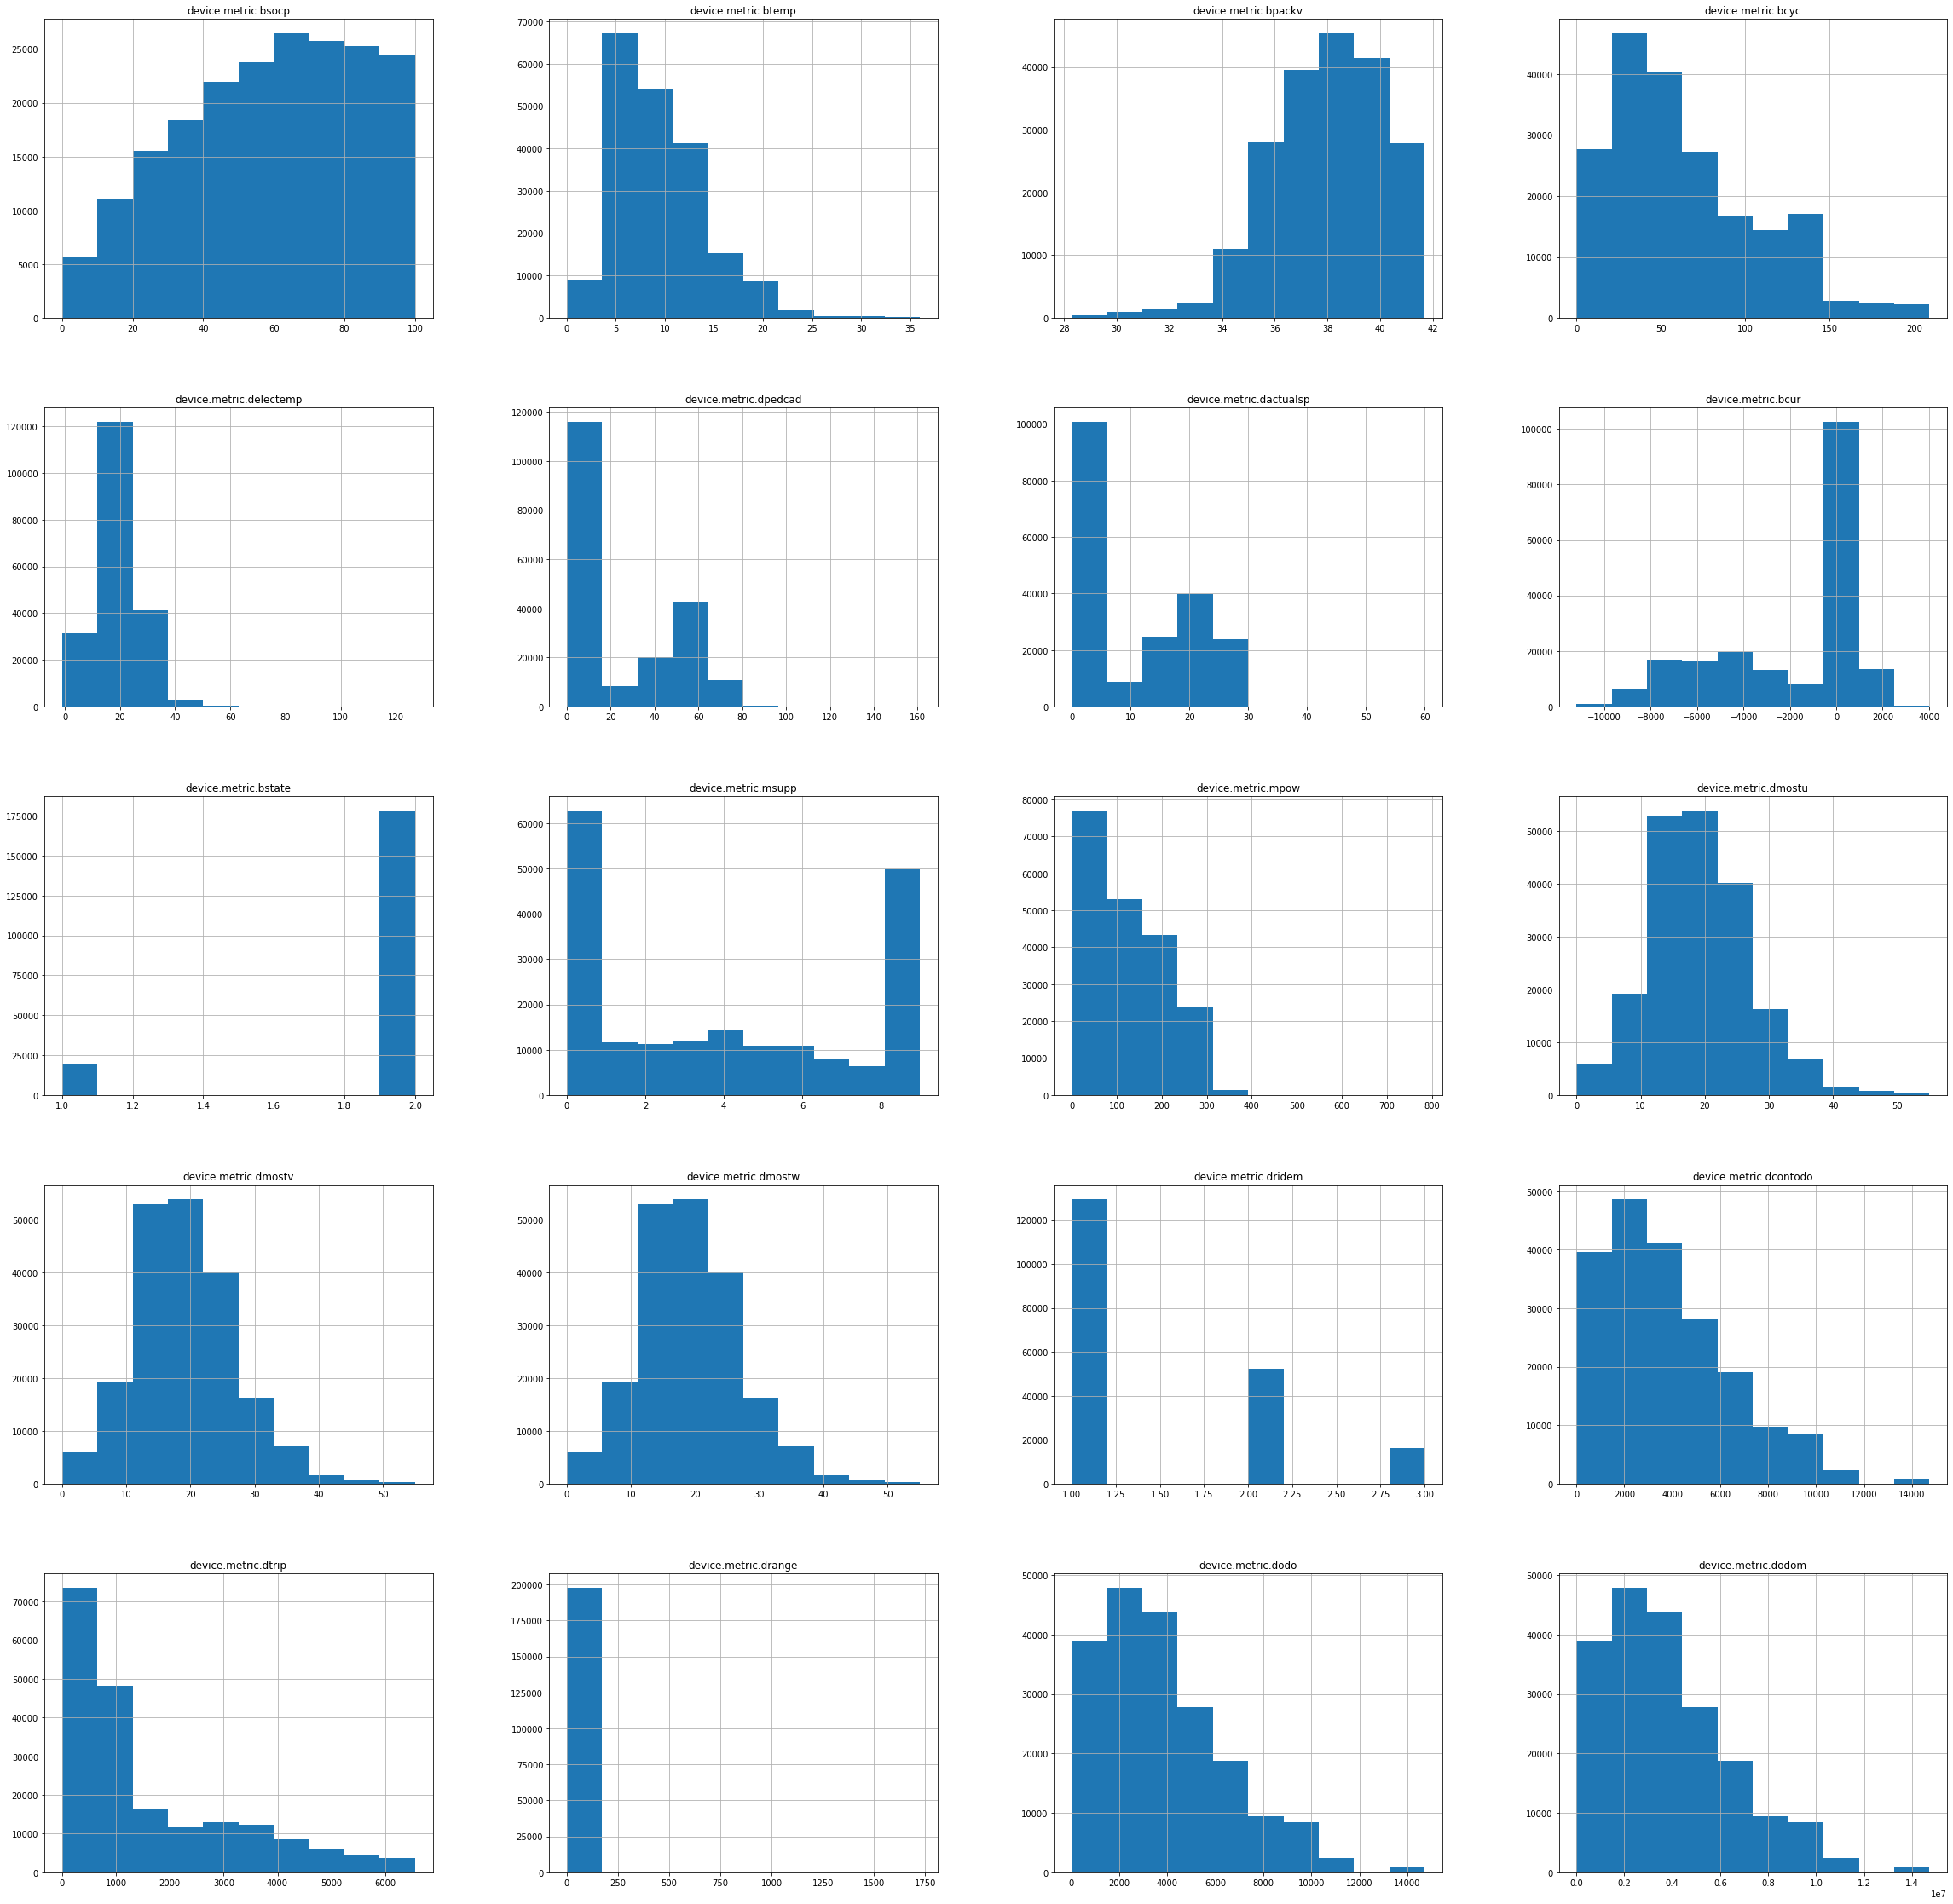

In [79]:
# Create a histogram for all the numerical columns
df_variables.hist(figsize=(40, 40))
plt.show()

In [80]:
# create a correlation matrix
correlation_matrix = df_variables.corr()
correlation_matrix

C:\Users\hb888\AppData\Local\Temp\ipykernel_25048\2642256513.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_variables.corr()


,device.metric.deculock,device.metric.bsocp,device.metric.btemp,device.metric.bpackv,device.metric.bcyc,device.metric.delectemp,device.metric.dpedcad,device.metric.dactualsp,device.metric.dlight,device.metric.bcur,...,device.metric.dmostu,device.metric.dmostv,device.metric.dmostw,device.metric.dridem,device.metric.ddayl,device.metric.dcontodo,device.metric.dtrip,device.metric.drange,device.metric.dodo,device.metric.dodom
device.metric.deculock,1.000000,0.009002,0.037807,0.011408,-0.015929,0.002008,-0.009686,-0.008232,-0.006656,0.008140,...,0.000687,0.000687,0.000687,-0.000055,-0.009628,-0.015792,-0.011764,0.000925,-0.012128,-0.012128
device.metric.bsocp,0.009002,1.000000,0.188308,0.906858,0.147771,0.051887,0.122144,0.147210,-0.009085,-0.102258,...,0.053198,0.053198,0.053198,-0.192662,-0.111927,0.143075,0.141484,0.610365,0.139804,0.139804
device.metric.btemp,0.037807,0.188308,1.000000,0.203530,0.029272,0.567723,0.037015,0.047832,-0.040986,-0.033721,...,0.568758,0.568758,0.568758,-0.013471,-0.034983,0.035628,0.057800,0.077152,0.036631,0.036631
device.metric.bpackv,0.011408,0.906858,0.203530,1.000000,0.181528,0.021767,-0.089088,-0.065178,-0.051681,0.163414,...,0.023165,0.023165,0.023165,-0.222762,-0.240468,0.139583,0.128780,0.647667,0.136498,0.136498
device.metric.bcyc,-0.015929,0.147771,0.029272,0.181528,1.000000,0.204826,0.147706,0.175126,0.109030,-0.158493,...,0.204831,0.204831,0.204831,-0.064083,-0.217821,0.681770,0.350800,-0.046488,0.683272,0.683272
device.metric.delectemp,0.002008,0.051887,0.567723,0.021767,0.204826,1.000000,0.092561,0.106209,0.015673,-0.117872,...,0.994624,0.994624,0.994624,0.055650,-0.057319,0.171355,0.088567,-0.001268,0.168024,0.168024
device.metric.dpedcad,-0.009686,0.122144,0.037015,-0.089088,0.147706,0.092561,1.000000,0.867073,0.227966,-0.833042,...,0.092173,0.092173,0.092173,-0.127409,0.150828,0.193155,0.148753,-0.153570,0.193501,0.193501
device.metric.dactualsp,-0.008232,0.147210,0.047832,-0.065178,0.175126,0.106209,0.867073,1.000000,0.270526,-0.800028,...,0.105712,0.105712,0.105712,-0.140240,0.172662,0.220885,0.171212,-0.221250,0.221283,0.221283
device.metric.dlight,-0.006656,-0.009085,-0.040986,-0.051681,0.109030,0.015673,0.227966,0.270526,1.000000,-0.290756,...,0.015079,0.015079,0.015079,0.056130,0.201880,0.097599,0.123419,-0.242420,0.100883,0.100883
device.metric.bcur,0.008140,-0.102258,-0.033721,0.163414,-0.158493,-0.117872,-0.833042,-0.800028,-0.290756,1.000000,...,-0.117585,-0.117585,-0.117585,0.074792,-0.230065,-0.179148,-0.167768,0.277015,-0.179698,-0.179698


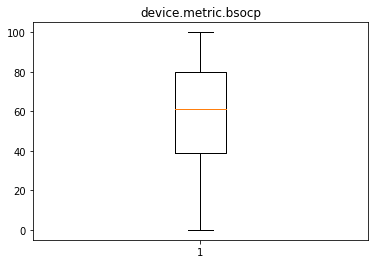

Outliers for device.metric.bsocp:
Series([], Name: device.metric.bsocp, dtype: float64)


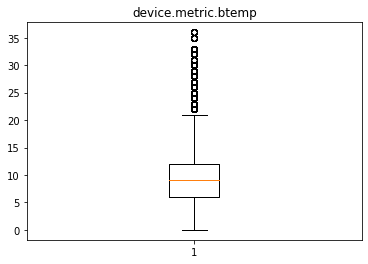

Outliers for device.metric.btemp:
34505     24.0
34508     24.0
34510     23.0
34512     23.0
34514     23.0
          ... 
717208    22.0
717212    22.0
717215    22.0
717218    22.0
717222    22.0
Name: device.metric.btemp, Length: 2706, dtype: float64


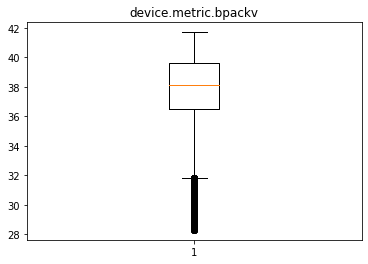

Outliers for device.metric.bpackv:
85639     31.83
85640     31.83
85641     31.83
85642     31.83
85643     31.83
          ...  
647784    31.18
658059    31.76
658062    31.65
658065    31.55
658069    31.43
Name: device.metric.bpackv, Length: 2143, dtype: float64


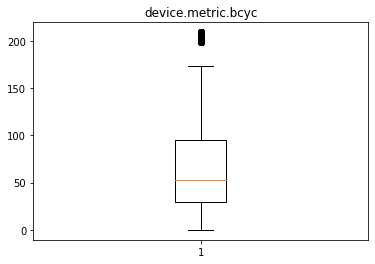

Outliers for device.metric.bcyc:
204085    202.0
204107    202.0
204118    202.0
204124    202.0
204127    202.0
          ...  
666392    201.0
666393    201.0
666394    201.0
666396    201.0
666398    201.0
Name: device.metric.bcyc, Length: 2224, dtype: float64


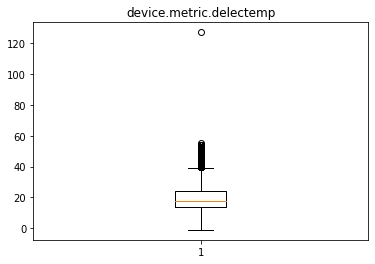

Outliers for device.metric.delectemp:
10787     40.0
10790     40.0
10793     40.0
10796     40.0
10800     40.0
          ... 
706834    52.0
706837    52.0
706840    51.0
706843    51.0
706846    50.0
Name: device.metric.delectemp, Length: 2255, dtype: float64


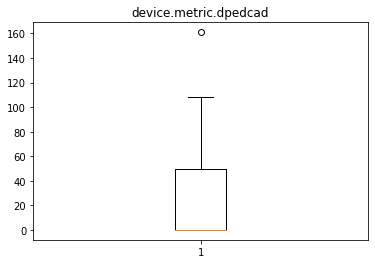

Outliers for device.metric.dpedcad:
533307    161.0
Name: device.metric.dpedcad, dtype: float64


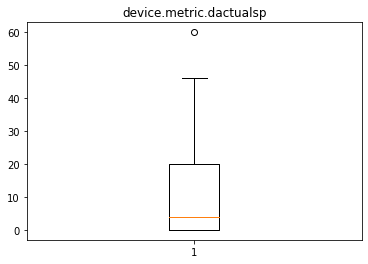

Outliers for device.metric.dactualsp:
379819    60.0
Name: device.metric.dactualsp, dtype: float64


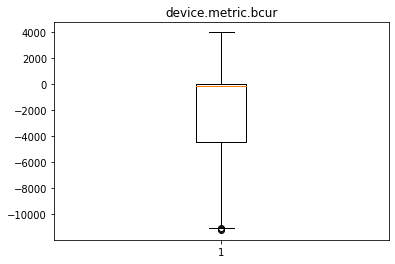

Outliers for device.metric.bcur:
170720   -11205.0
171732   -11098.0
171738   -11080.0
Name: device.metric.bcur, dtype: float64


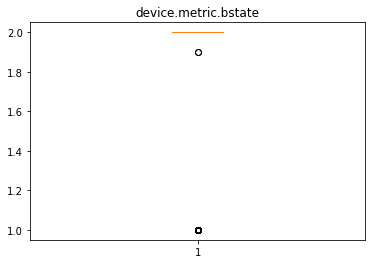

Outliers for device.metric.bstate:
27        1.0
28        1.0
29        1.0
30        1.0
31        1.0
         ... 
721165    1.0
721166    1.0
721167    1.0
721168    1.0
721169    1.0
Name: device.metric.bstate, Length: 19907, dtype: float64


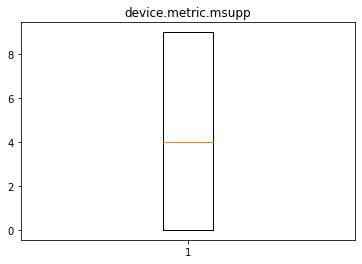

Outliers for device.metric.msupp:
Series([], Name: device.metric.msupp, dtype: float64)


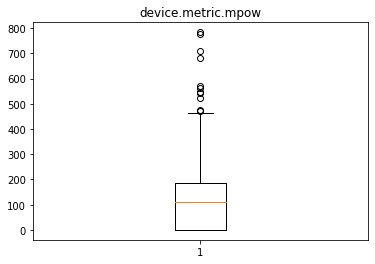

Outliers for device.metric.mpow:
106       471.0
14400     710.0
60649     477.0
174257    542.0
219719    524.0
264945    776.0
266695    547.0
287589    784.0
573689    563.0
685114    570.0
685117    680.0
Name: device.metric.mpow, dtype: float64


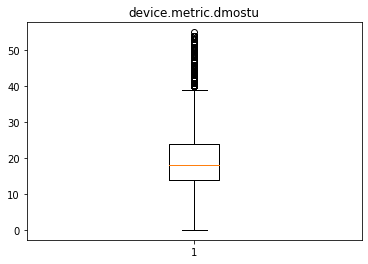

Outliers for device.metric.dmostu:
10787     40.0
10790     40.0
10793     40.0
10796     40.0
10800     40.0
          ... 
706834    52.0
706837    52.0
706840    51.0
706843    51.0
706846    50.0
Name: device.metric.dmostu, Length: 2252, dtype: float64


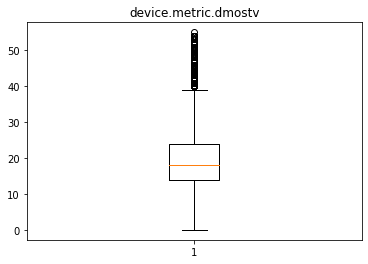

Outliers for device.metric.dmostv:
10787     40.0
10790     40.0
10793     40.0
10796     40.0
10800     40.0
          ... 
706834    52.0
706837    52.0
706840    51.0
706843    51.0
706846    50.0
Name: device.metric.dmostv, Length: 2252, dtype: float64


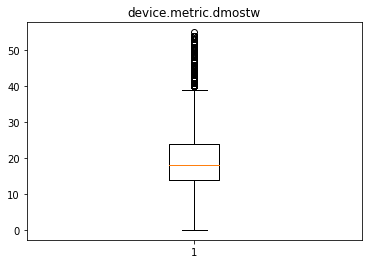

Outliers for device.metric.dmostw:
10787     40.0
10790     40.0
10793     40.0
10796     40.0
10800     40.0
          ... 
706834    52.0
706837    52.0
706840    51.0
706843    51.0
706846    50.0
Name: device.metric.dmostw, Length: 2252, dtype: float64


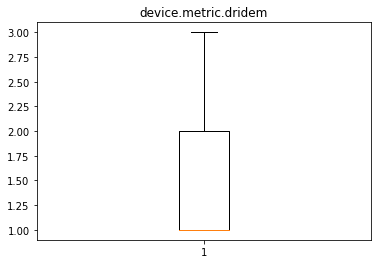

Outliers for device.metric.dridem:
Series([], Name: device.metric.dridem, dtype: float64)


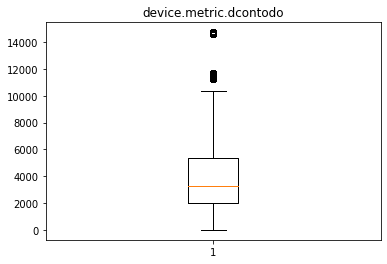

Outliers for device.metric.dcontodo:
204085    11296.0
204107    11296.0
204118    11296.0
204124    11296.0
204127    11296.0
           ...   
699295    11437.0
699298    11437.0
699301    11438.0
699304    11438.0
699307    11438.0
Name: device.metric.dcontodo, Length: 2784, dtype: float64


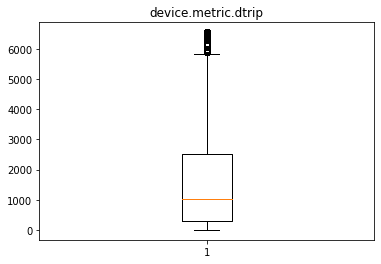

Outliers for device.metric.dtrip:
148424    6129.5
148425    6129.6
148428    6129.6
148432    6129.7
148436    6129.9
           ...  
724809    5973.5
724812    5973.6
724815    5973.8
724818    5973.9
724821    5973.9
Name: device.metric.dtrip, Length: 3788, dtype: float64


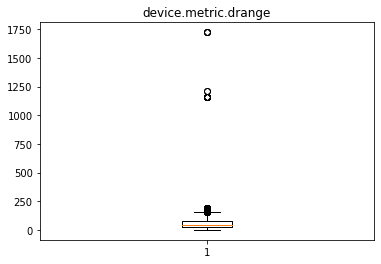

Outliers for device.metric.drange:
34505     168.0
34508     168.0
69520     159.0
69521     159.0
69522     159.0
          ...  
692739    159.0
692744    159.0
692747    159.0
692750    159.0
706039    164.0
Name: device.metric.drange, Length: 1909, dtype: float64


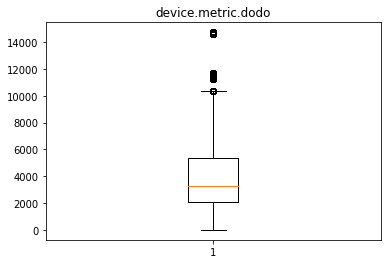

Outliers for device.metric.dodo:
204085    11296.0
204107    11296.0
204118    11296.0
204124    11296.0
204127    11296.0
           ...   
699295    11437.0
699298    11437.0
699301    11438.0
699304    11438.0
699307    11438.0
Name: device.metric.dodo, Length: 3060, dtype: float64


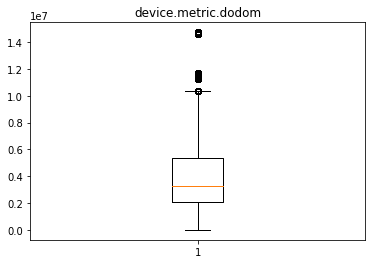

Outliers for device.metric.dodom:
204085    11296000.0
204107    11296000.0
204118    11296000.0
204124    11296000.0
204127    11296000.0
             ...    
699295    11437000.0
699298    11437000.0
699301    11438000.0
699304    11438000.0
699307    11438000.0
Name: device.metric.dodom, Length: 3060, dtype: float64


In [81]:
# create boplots for the numerical columns, to see if there are any outliers
for column in df_variables.columns:
    if df_variables[column].dtype in ['float64', 'int64']:
        plt.boxplot(df_variables[column])
        plt.title(column)
        plt.show()

        # show outliers
        Q1 = df_variables[column].quantile(0.25)
        Q3 = df_variables[column].quantile(0.75)
        IQR = Q3 - Q1
        print(f"Outliers for {column}:")
        print(df_variables[(df_variables[column] < (Q1 - 1.5 * IQR)) | (df_variables[column] > (Q3 + 1.5 * IQR))][column])
        

In [82]:
# use a kmeans clustering algorithm to cluster the data and see if there are any patterns, visualise the clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()

df_variables_scaled = scaler.fit_transform(df_variables)

# create a kmeans model
kmeans = KMeans(n_clusters=50, random_state=0)

# fit the model
kmeans.fit(df_variables_scaled)

# create a new column in the dataframe called "cluster" and assign the cluster to each row
df_variables['cluster'] = kmeans.labels_

# create a scatter plot of the clusters
plt.scatter(df_variables['device.metric.btemp'], df_variables['device.metric.bpackv'], c=df_variables['cluster'])
plt.xlabel('temperature')
plt.ylabel('voltage')
plt.title('Clusters of locations')
plt.show()

KeyboardInterrupt: 

In [ ]:
df_variables

,device.metric.deculock,device.metric.dstatus,device.metric.bsocp,device.metric.btemp,device.metric.bpackv,device.metric.bcyc,device.metric.delectemp,device.metric.dpedcad,device.metric.dactualsp,device.metric.dlight,...,device.metric.dmostw,device.metric.dridem,device.metric.ddayl,device.metric.dcontodo,device.metric.dtrip,device.metric.dwalk,device.metric.drange,device.metric.dodo,device.metric.dodom,cluster
12,False,True,10.0,3.0,33.52,0.0,0.0,0.0,0.0,False,...,0.0,1.0,True,722.0,722.0,False,55.251452,3872.577226,3.872577e+06,44
20,False,True,10.0,3.0,33.52,0.0,0.0,0.0,0.0,False,...,0.0,1.0,True,722.0,722.0,False,55.251452,3872.577226,3.872577e+06,44
27,False,True,10.0,3.0,33.77,11.0,0.0,0.0,0.0,False,...,0.0,1.0,False,722.0,722.0,False,13.000000,3872.577226,3.872577e+06,40
28,False,True,10.0,3.0,34.87,11.0,4.0,0.0,0.0,False,...,4.0,1.0,False,722.0,722.0,False,13.000000,722.000000,7.220000e+05,40
29,False,True,10.0,3.0,34.93,11.0,4.0,0.0,0.0,False,...,4.0,1.0,False,722.0,722.0,False,13.000000,722.000000,7.220000e+05,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725832,False,True,61.0,3.0,37.56,48.0,17.0,45.0,20.0,True,...,17.0,1.0,False,870.0,870.7,False,74.000000,870.000000,8.700000e+05,37
725835,False,True,61.0,3.0,38.28,48.0,17.0,11.0,20.0,True,...,17.0,1.0,False,870.0,870.9,False,74.000000,870.000000,8.700000e+05,37
725838,False,True,61.0,3.0,38.44,48.0,16.0,0.0,18.0,True,...,16.0,1.0,False,871.0,871.1,False,84.000000,871.000000,8.710000e+05,37
725842,False,True,61.0,3.0,38.54,48.0,16.0,0.0,10.0,True,...,16.0,1.0,False,871.0,871.2,False,84.000000,871.000000,8.710000e+05,17


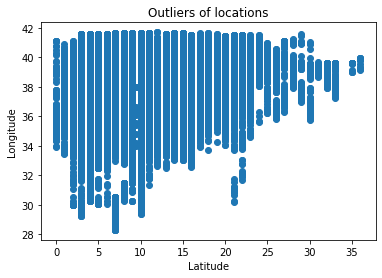

In [ ]:
# visualize the outliers
plt.scatter(df_variables['device.metric.btemp'], df_variables['device.metric.bpackv'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Outliers of locations')
plt.show()